In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
output_dir = "./img/TreesPerBM/"

def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

In [4]:
def generateFilenameQueryEventsCorrect(bmtuple):
    fname = './csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryevents_correct.csv"

# 1. Scatterplots and Density plots don't reveal anything

# 2. Can we use Decision Trees to explain why queries fail (classification)




In [5]:
query_features = './OntoforceQueryAnalysis/ontoforce_query_features.tsv'
df_queryfeatures = pd.read_csv(query_features, sep='\t', index_col=0)
df_queryfeatures.head(n=3)

,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,tp_sp?,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xaa,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,0.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xab,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,0.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xac,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0


In [6]:
tuple_list = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]

In [7]:
filename = generateFilenameQueryEventsCorrect(tuple_list[3])
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values

df.head(n=5)

,sim_id,query_name,thread_id,thread_type,order_id,number_of_results,runtime,flag,correct
xzatg,Vir_N1_64_Ont_Opt,queries/xzatg,1,warmup,1,1,0.035582,SUCCESS,CORRECT
xzatg,Vir_N1_64_Ont_Opt,queries/xzatg,26,stress,726,1,4.077542,SUCCESS,CORRECT
xzatg,Vir_N1_64_Ont_Opt,queries/xzatg,18,stress,32,1,0.006622,SUCCESS,CORRECT
xzatg,Vir_N1_64_Ont_Opt,queries/xzatg,23,stress,539,1,72.758275,SUCCESS,CORRECT
xzatg,Vir_N1_64_Ont_Opt,queries/xzatg,25,stress,196,1,0.005674,SUCCESS,CORRECT


In [8]:
pd.crosstab(df['flag'], df['correct'])

correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,48,0
SUCCESS,7069,60,120
TIMEOUT,0,41,0


In [9]:
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2.head(n=3)

,flag,correct
xzatg,SUCCESS,CORRECT
xzatg,SUCCESS,CORRECT
xzatg,SUCCESS,CORRECT


### Create classes

* 3: success   = 3 * correct(=1)   + success(=0)  = 3
* 1: error     = 3 * incorrect(=0) + error(=1)
* 2: timeout   = 3 * incorrect(=0) + timeout(=2)
* 0: incorrect = 3 * incorrect(=0) + success(=0) = 0

In [10]:
def convertflag(flag):
    if flag == 'SUCCESS':
        return 0
    elif flag == 'ERROR':
        return 1
    else: #timeout
        return 2

def convertcorrect(c):
    if c == 'CORRECT':
        return 1
    elif c == 'INCORRECT':
        return 0
    else:
        return 1
    
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df3.head(n=5)

,class
xzatg,3
xzatg,3
xzatg,3
xzatg,3
xzatg,3


In [11]:
df4 = df3.join(df_queryfeatures)
df4.head(n=5)

,class,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xaa,3,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,3,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,3,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,3,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xaa,3,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0


### Create Decision Tree Classifier

In [12]:
from sklearn import tree
import graphviz 

In [13]:
model = tree.DecisionTreeClassifier(max_depth=4)

X = df4[df4.columns[1:]].as_matrix()
y = df4['class'].as_matrix()

In [14]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

['#incorrect, #http error, #timeout, #success]


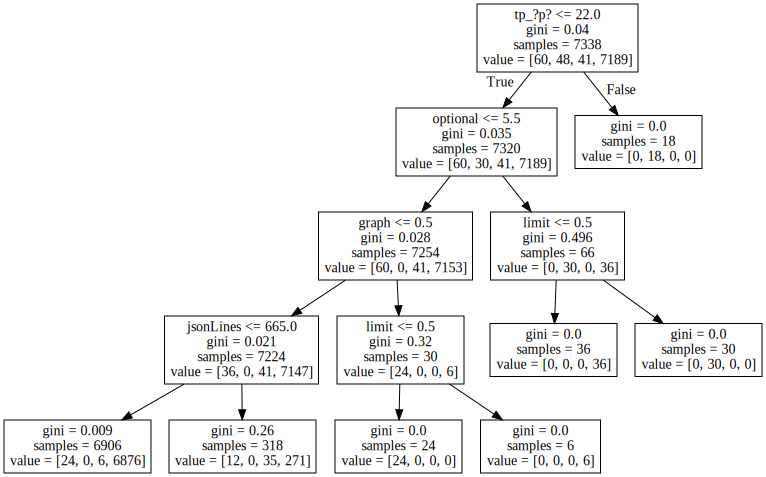

In [15]:
treedata = tree.export_graphviz(model, out_file=None, feature_names=df4.columns[1:]) 
graph = graphviz.Source(treedata) 
#graph.render("iris", view=False) #creates an svg file 'iris'

print("['#incorrect, #http error, #timeout, #success]")
graph

In [16]:
for imp, f in zip(list(model.feature_importances_), list(df4.columns[1:])):
    print(str(imp) + "\t\t <= \t" + str(f))

0.0		 <= 	order
0.0		 <= 	filter_in
0.27955148435		 <= 	limit
0.0		 <= 	distinct
0.0		 <= 	triplePattern
0.0		 <= 	tp_?po
0.0		 <= 	union
0.23201463702		 <= 	tp_?p?
0.0		 <= 	aggregation_count
0.0		 <= 	tp_sp?
0.0		 <= 	bgp
0.247660163788		 <= 	graph
0.173158729874		 <= 	optional
0.0		 <= 	keys
0.0		 <= 	filter
0.0		 <= 	tp_???
0.0		 <= 	group
0.0		 <= 	query
0.067614984968		 <= 	jsonLines
0.0		 <= 	jsonSize
0.0		 <= 	depth


### We had a look at the query features and their correlations in the previous notebook, so let's select the most independent ones...

In [17]:
interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

In [18]:
df5.columns

Index(['class', 'group', 'optional', 'order', 'filter_in', 'filter',
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize'],
      dtype='object')

In [19]:
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=73, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

['#incorrect, #http error, #timeout, #success]


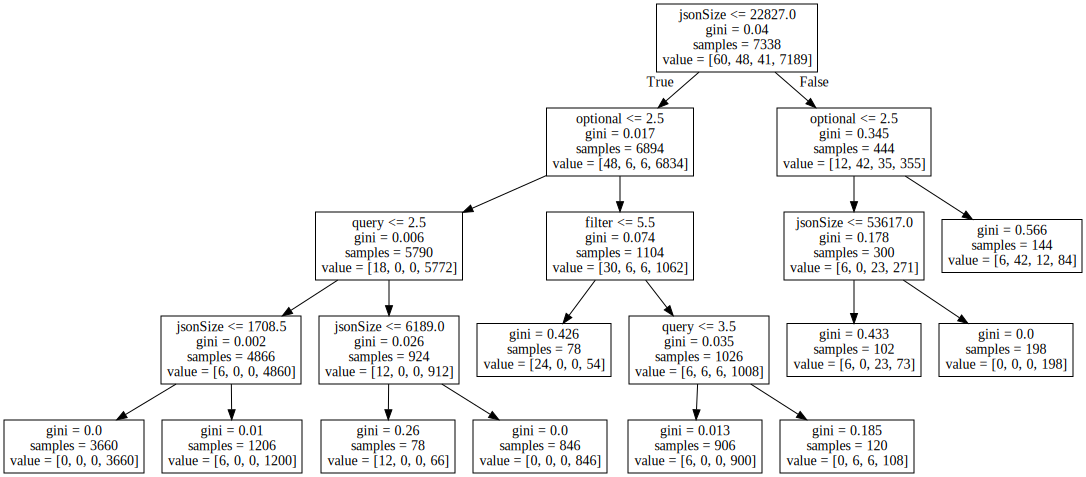

In [20]:
treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tuple_list[3]), view=False)
print("['#incorrect, #http error, #timeout, #success]")

graph

### Observations Virtuoso_64:

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 7,338 | 60  | 48  | 41   | 7189   |   
| OPT $\geq 4$, TP $\geq 22$  | 5% | 10%  | 100%  | 29%   | 4%   |   
| OPT $=3$, FIL_IN $\leq 3$  | 11% | 50%  | 0%  | 0%   | 11%   |   
| OPT $ \leq 3$, FIL_IN $\geq 4$, FIL $\leq 24$  | 3% | 10%  | 0%  | 44%   | 3%   |   





In [21]:
#calculations to create markdown table
distrib = np.array([6, 0, 18, 192])
totals = np.array([60, 48, 41, 7189])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 10.           0.          43.90243902   2.67074697]
0.0294358135732
7338


In [22]:
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    print(str(imp) + "\t\t <= \t" + str(f))

0.0		 <= 	group
0.291633529443		 <= 	optional
0.0		 <= 	order
0.0		 <= 	filter_in
0.185236569459		 <= 	filter
0.0		 <= 	aggregation_count
0.0		 <= 	graph
0.0		 <= 	triplePattern
0.0243783443679		 <= 	query
0.49875155673		 <= 	jsonSize


In [23]:
from sklearn import ensemble

In [24]:
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

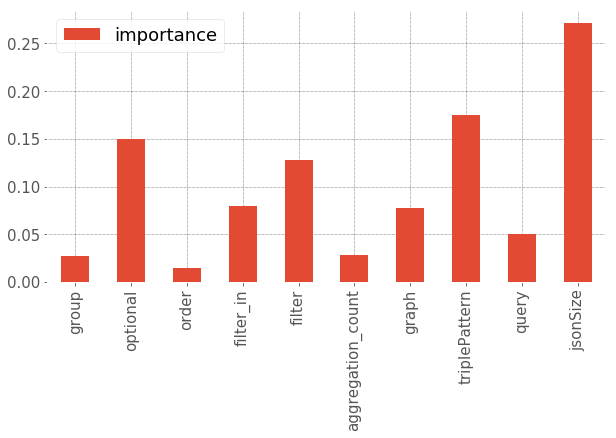

In [25]:
rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))

## We could mention, or create a table with the most important query features?

### query failure:

* Virtuoso:
    1. TP
    2. FILTER
    3. OPTIONAL
    * **Additional observation:** Since many FILTERs are in fact used to bind URIs to variables the importance of tp_??? and FILTER could indicate that the query optimizers of the triple stores are not capable to fully take advantage of this fact
    
    

In [26]:
tuple_list = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]

## A. Blazegraph Ontoforce 

In [27]:
tup = tuple_list[0]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(468, 9)


correct,CORRECT,INCORRECT
flag,,
SUCCESS,36,1
TIMEOUT,0,431


In [28]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

['#incorrect, #timeout, #success]


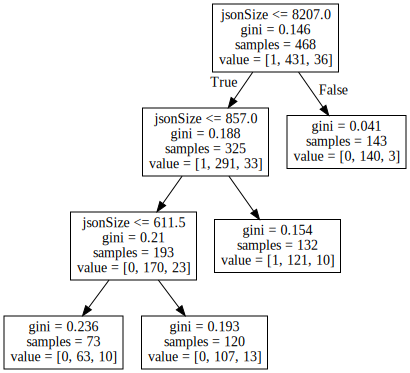

In [29]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #timeout, #success]")

graph

In [30]:
#calculations to create markdown table
distrib = np.array([1, 103, 9])
totals = np.array([1, 431, 36])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 100.           23.89791183   25.        ]
0.241452991453
468


### Observations Blazegraph_N1_64

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 468 | 1  | 0  | 431   | 36   |   
| TP $\geq 10$  | 30% | 0%  | 0%  | 32%   | 8%   |   
| TP $< 10$, FIL $=0$, TP$=1$   | 46% | 0%  | 0%  | 44%   | 66%   |   
| TP $< 10$, FIL $ > 0$    | 24% | 100%  | 0%  | 24%   | 25%   |


* Blazegraph only manages to for queries very low in complexity, if more than 10 TP, or Filters are present Blazegraph has problems!

group                0.014640
optional             0.042347
order                0.018760
filter_in            0.017509
filter               0.088479
aggregation_count    0.007336
graph                0.016098
triplePattern        0.085140
query                0.040272
jsonSize             0.669419
Name: importance, dtype: float64


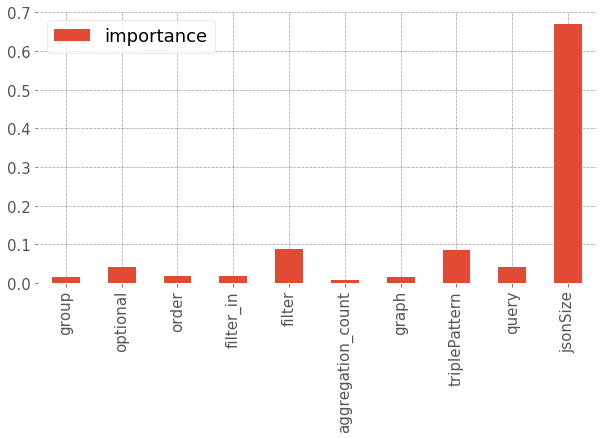

In [31]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query failures
* Blazegraph: 
    1. TP
    2. FILTER
    3. OPTIONAL
    * **Additional observation:** Since many FILTERs are in fact used to bind URIs to variables the importance of tp_??? and FILTER could indicate that the query optimizers of the triple stores are not capable to fully take advantage of this fact. Given the DT this seems very likely for Blazegraph
    

## B. ES Ontoforce 

In [32]:
tup = tuple_list[1]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(7338, 9)


correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,1830,0
SUCCESS,4246,1,4
TIMEOUT,0,1257,0


In [33]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
        'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

['#incorrect, #http_error, #timeout, #success]


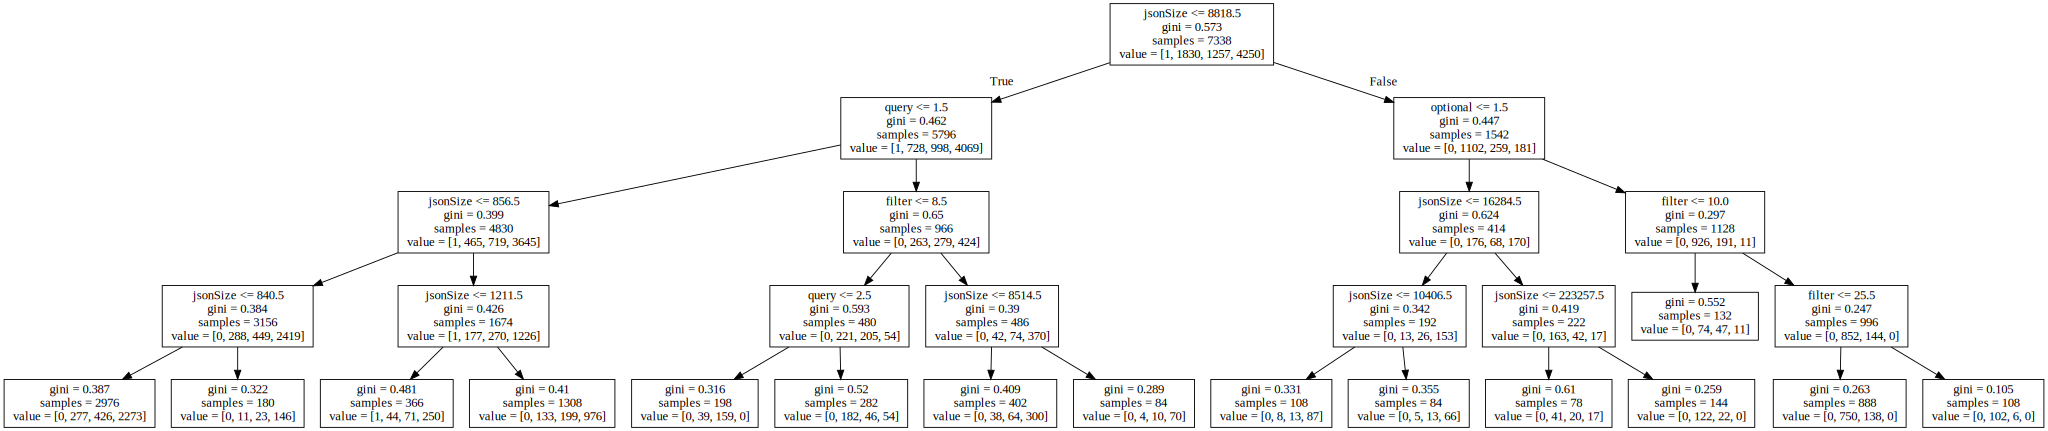

In [34]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #http_error, #timeout, #success]")

graph


In [35]:
#calculations to create markdown table
distrib = np.array([0, 1039, 305, 0])
totals = np.array([1, 1830, 1257, 4250])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[  0.          56.77595628  24.26412092   0.        ]
0.183156173344
7338


| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 7338 | 1  | 1830  | 1257   | 4250   |   
| Q $ \geq 2$  | 33% | 0%  | 74%  | 42%   | 14%   |   
| Q $ \geq 2$, OPT $\geq 2$  | 18% | 0%  | 57%  | 24%   | 0%   |   
| TP $< 10$, FIL $ > 0$    | 24% | 100%  | 0%  | 24%   | 25%   |

* ES has a very different picture: the amount of subqueries has a dominant influence



group                0.004248
optional             0.146097
order                0.035211
filter_in            0.056765
filter               0.140385
aggregation_count    0.012134
graph                0.000581
triplePattern        0.075080
query                0.173320
jsonSize             0.356178
Name: importance, dtype: float64


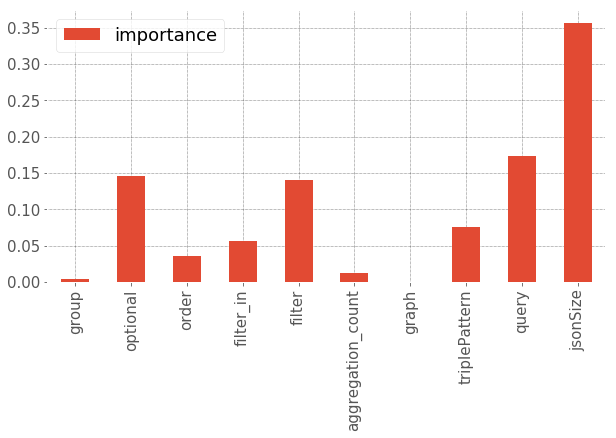

In [36]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query failures
* ES: 
    1. query
    2. OPTIONAL
    3. FILTER
    * **Additional observation:** Especially the effect of the amount of queries is different. OPTIONALs and FILTERs seem to be a recurring theme.

## C. GraphDB Ontoforce 

In [37]:
tup = tuple_list[2]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(3955, 9)


correct,CORRECT,INCORRECT
flag,,
SUCCESS,1583,0
TIMEOUT,0,2372


In [38]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

[#timeout, #success]


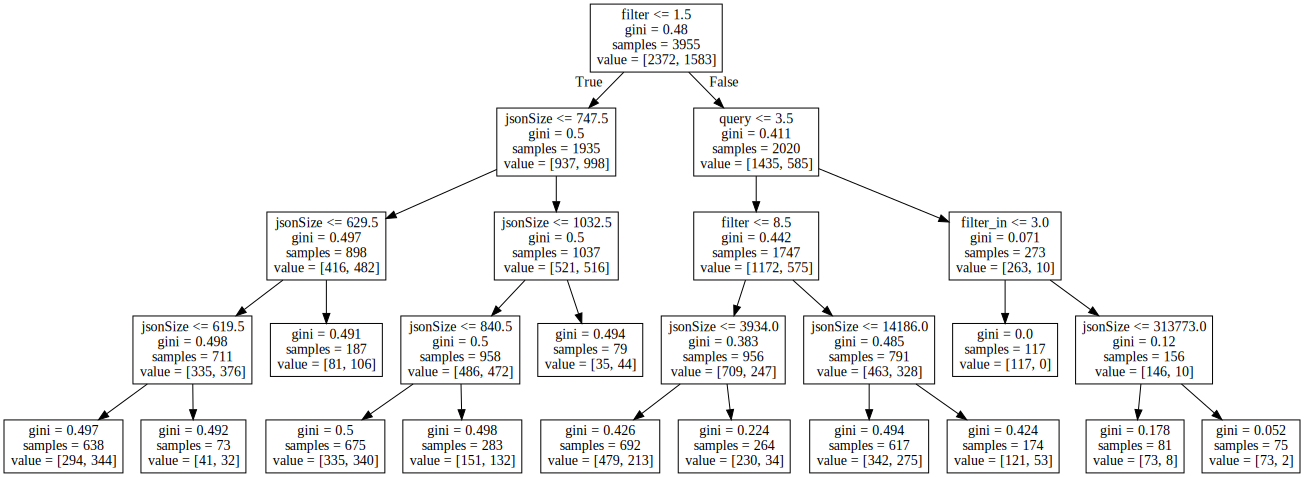

In [39]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("[#timeout, #success]")

graph


In [40]:
#calculations to create markdown table
distrib = np.array([1435, 585])
totals = np.array([2372, 1583])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 60.49747049  36.95514845]
0.510745891277
3955


### Observations GraphDB_N1_64

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 3955 | 0  | 0  | 2372   | 1583   |   
| FIL $\geq 2$   | 51% | 0%  | 0%  | 60%   | 37%   |   
| FIL $\geq 2$, Q $\geq 4$  | 7% | 0%  | 0%  | 11%   | 1%   |   

* Quite hard to see any real pattern. The DT cannot get to low gini coefficients. 

group                0.010071
optional             0.049981
order                0.014797
filter_in            0.055732
filter               0.143894
aggregation_count    0.056654
graph                0.001596
triplePattern        0.074499
query                0.060530
jsonSize             0.532246
Name: importance, dtype: float64


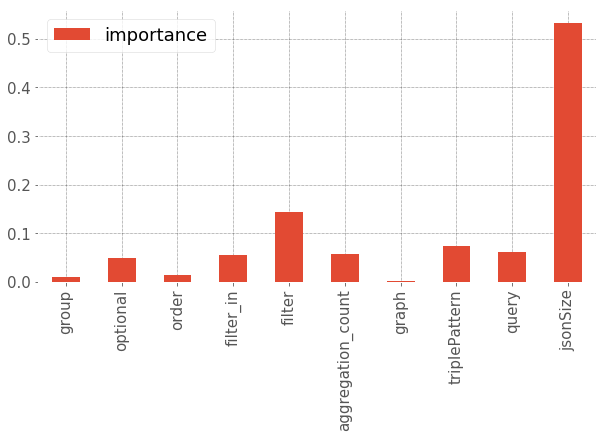

In [41]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
    
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])


### Feature Importance w.r.t. query failures
* GraphDB: 
    1. FILTER 
    2. TP
    3. tp_???
    * **Additional observation:** Again filters play an important role, something that does differ from the previous stores is that OPTIONAL seems less important! GraphDB also seems least comfortable with unbound triples

## D. Virtuoso_N1_64 Ontoforce 

In [42]:
tup = tuple_list[3]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(7338, 9)


correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,48,0
SUCCESS,7069,60,120
TIMEOUT,0,41,0


In [43]:

#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

['#incorrect, #server error, #timeout, #success]


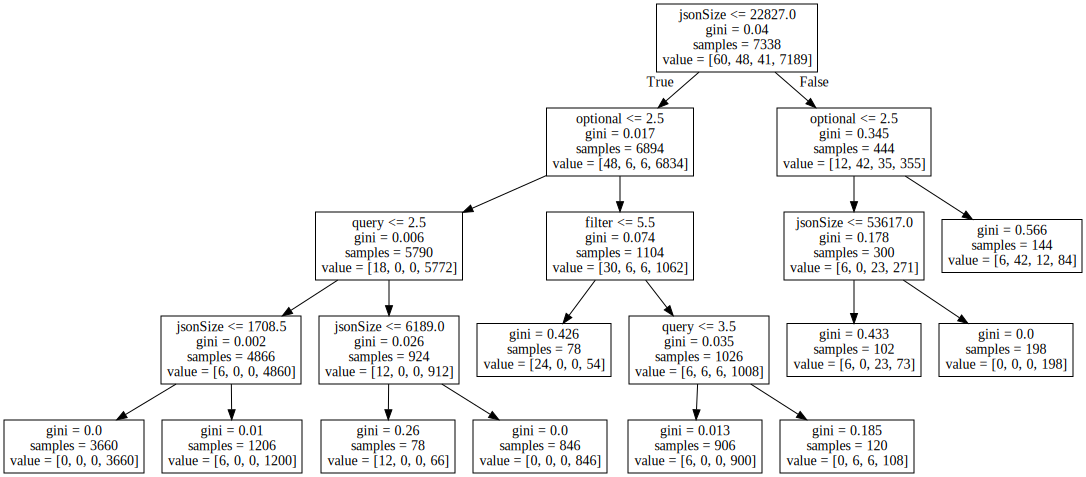

In [44]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #server error, #timeout, #success]")

graph

In [45]:
#calculations to create markdown table
distrib = np.array([60, 48, 41, 7189])
totals = np.array([60, 48, 41, 7189])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 100.  100.  100.  100.]
1.0
7338


### Observations Virtuoso_N1_64

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 7,338 | 60  | 48  | 41   | 7189   |   
| OPT $\geq 4$, TP $\geq 22$  | 5% | 10%  | 100%  | 29%   | 4%   |   
| OPT $=3$, FIL_IN $\leq 3$  | 11% | 50%  | 0%  | 0%   | 11%   |   
| OPT $ \leq3$, FIL_IN $\geq 4$, FIL $\leq 24$  | 3% | 10%  | 0%  | 44%   | 3%   | 

* Virtuoso especially seems to be impacted by OPTIONALs and FILTER IN queries

group                0.027047
optional             0.147396
order                0.014992
filter_in            0.080811
filter               0.124583
aggregation_count    0.027819
graph                0.076514
triplePattern        0.179713
query                0.048094
jsonSize             0.273032
Name: importance, dtype: float64


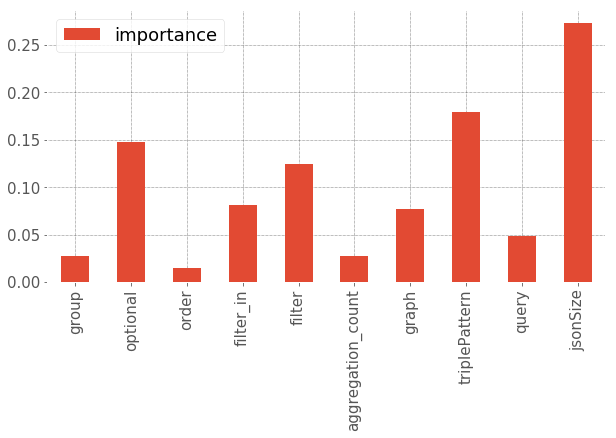

In [46]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query failures
* Virtuoso N1 64: 
    1. TP
    2. FILTER
    3. OPTIONAL
   


## E. Virtuoso_N1_32

In [47]:
tup = tuple_list[4]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(7338, 9)


correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,48,0
SUCCESS,7072,60,119
TIMEOUT,0,39,0


In [48]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

['#incorrect, #server error, #timeout, #success]


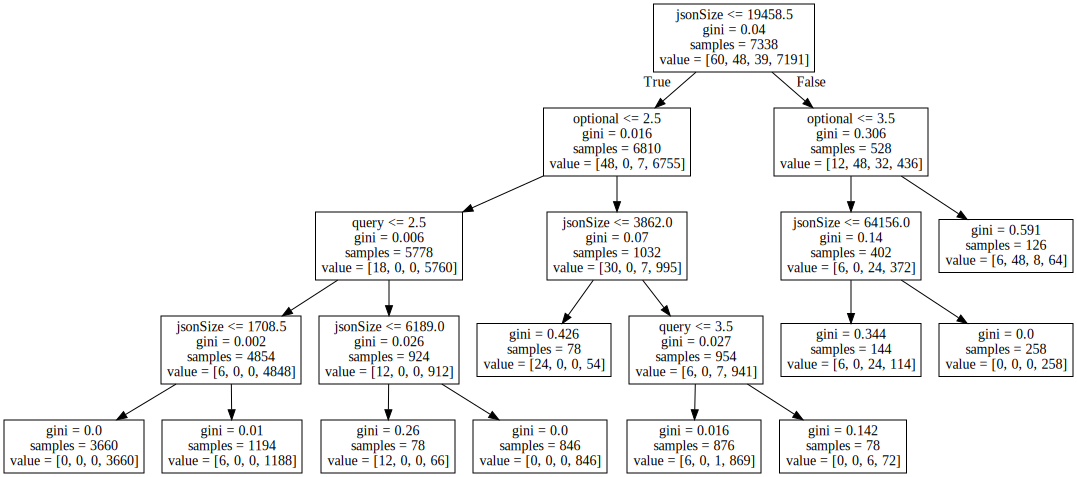

In [49]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #server error, #timeout, #success]")

graph

In [50]:
#calculations to create markdown table
distrib = np.array([60, 48, 39, 7191])
totals = np.array([60, 48, 39, 7191])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 100.  100.  100.  100.]
1.0
7338


### Observations Virtuoso_N1_32

* almost identical to Virtuoso_N1_64

group                0.024759
optional             0.148856
order                0.017921
filter_in            0.066209
filter               0.134140
aggregation_count    0.027043
graph                0.080086
triplePattern        0.171569
query                0.043476
jsonSize             0.285941
Name: importance, dtype: float64


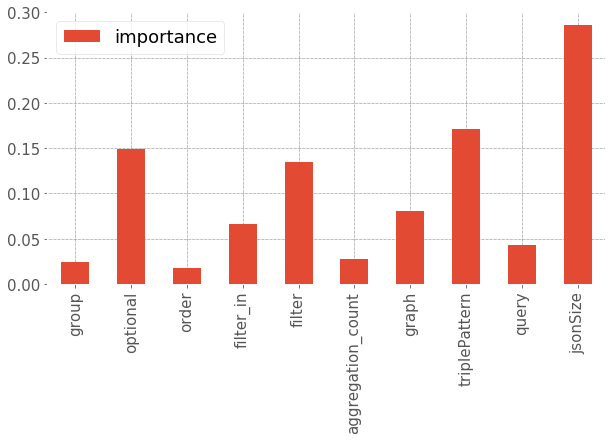

In [51]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])


### Feature Importance w.r.t. query failures
* same as for V64

## F. Virtuoso N3_0 Ontoforce 

In [52]:
tup = tuple_list[5]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(7338, 9)


correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,3182,0
SUCCESS,4072,27,38
TIMEOUT,0,19,0


In [53]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]

['#incorrect, #server error #timeout, #success]


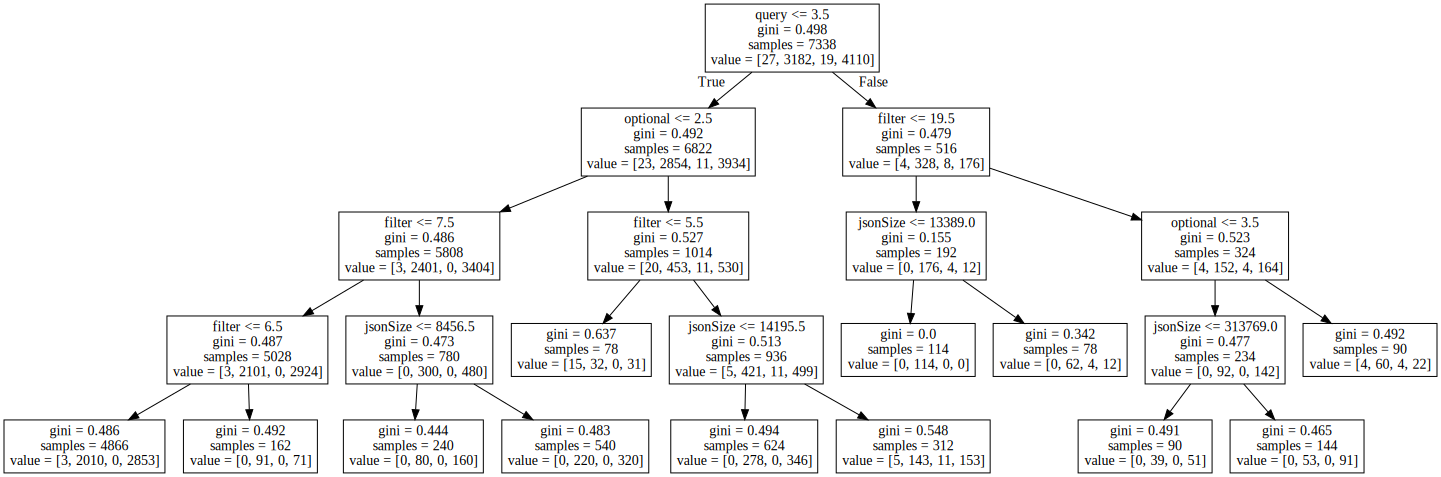

In [54]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #server error #timeout, #success]")

graph

In [55]:
#calculations to create markdown table
distrib = np.array([20, 453, 11, 530])
totals = np.array([27, 3182, 19, 4110])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[ 74.07407407  14.23632935  57.89473684  12.89537713]
0.138184791496
7338


### Observations Virtuoso_N3_64

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 468 | 1  | 0  | 431   | 36   |   
| Q $\geq 4$  | 7% | 15%  | 10%  | 42%   | 4%   |   
| Q $< 4$, OPT $\geq 3$   | 14% | 74%  | 14%  | 58%   | 13%   |   

* It's always hard to distinguish between server errors and successful queries, maybe these errors can be attributed to the server load causing a server to send a HTTP error sooner because it's busy?
* Optionals are hard and cause timeouts and incorrect solutions

group                0.025498
optional             0.051696
order                0.034080
filter_in            0.048179
filter               0.087531
aggregation_count    0.016164
graph                0.013292
triplePattern        0.093677
query                0.070200
jsonSize             0.559683
Name: importance, dtype: float64


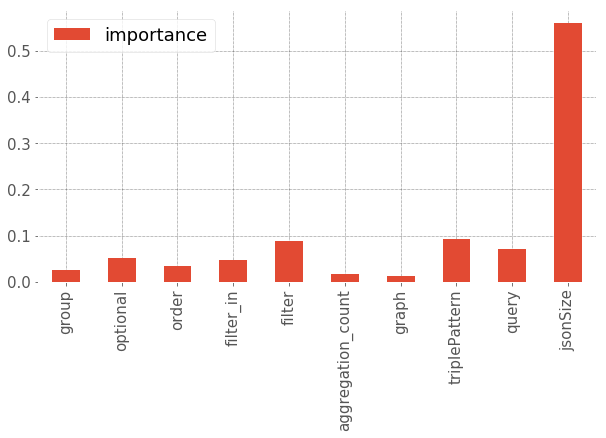

In [56]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query failures
* Virtuoso N3: 
    1. TP
    2. FILTER
    3. Query
    * **Additional observation:** Subqueries are a lot more problematic for the Virtuoso Cluster edition, probably since they require more internode communication?
    

## G. Virtuso N3 _2 Ontoforce: big amount of incorrect queries

In [57]:
tup = tuple_list[6]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
pd.crosstab(df['flag'], df['correct'])

(7338, 9)


correct,CORRECT,INCORRECT,UNCERTAIN
flag,,,
ERROR,0,636,0
SUCCESS,3918,2718,66


In [58]:
#clean up data
df2 = df.drop(['sim_id', 'query_name', 'thread_type', 'runtime', 'number_of_results', 'thread_id', 'order_id'],axis=1)
df2['flag2'] = df2['flag'].apply(convertflag)
df2['correct2'] = df2['correct'].apply(convertcorrect)
df2['class'] = 3*df2['correct2'] + df2['flag2'] 
df3 = df2.drop(['flag', 'correct', 'flag2', 'correct2'],axis=1)
df4 = df3.join(df_queryfeatures)

interesting_cols = ['class', 'group', 'optional', 'order', 'filter_in', 'filter', 
       'aggregation_count', 'graph', 'triplePattern', 'query', 'jsonSize']

df5 = df4[interesting_cols]


['#incorrect, #server error #success]


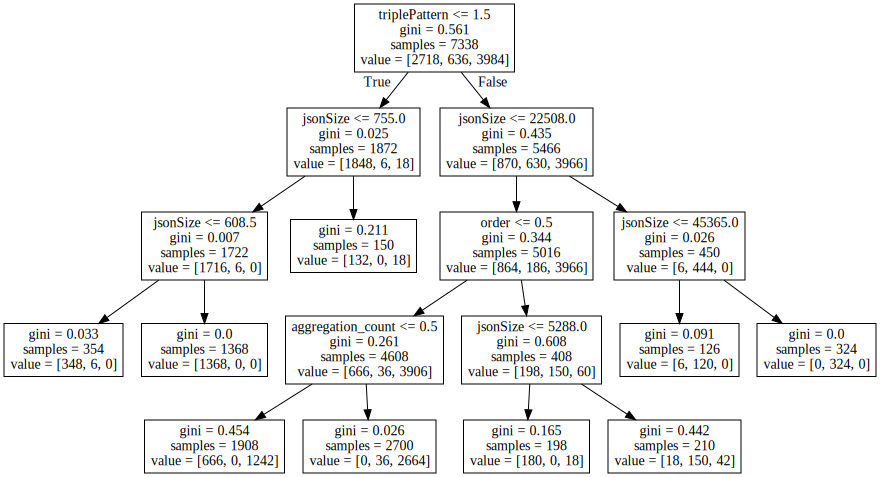

In [59]:
#FIT Decision Tree
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=(6*1223)//100)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df5.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + generateSimulationIDCompact(tup), view=False)
print("['#incorrect, #server error #success]")

graph


In [60]:
#calculations to create markdown table
distrib = np.array([24, 450, 42])
totals = np.array([2718, 636, 3984])
print(100*distrib/totals)
print(np.sum(distrib)/np.sum(totals))
print(np.sum(totals))

[  0.88300221  70.75471698   1.05421687]
0.0703188879804
7338


### Observations Virtuoso N3 64 _ 2

| Rule   | #Queries  | fr_incorrect | fr_error | fr_timeout | fr_success | 
|---|---|---|---|---|---|
| All  | 7338 |   | 0  | 431   | 36   |   
| TP $< 2$  | 25% | 68%  | 1%  | 0%   | 0%   |   
| TP $\geq 2$, Q $\geq 3$  | 7% | 1%  | 71%  | 0%   | 1%   |   

* Rather strange: the incorrect queries seem to be simple queries? And this is both in the warmup and in the stress test!?
* Server errors when many subqueries

group                0.008046
optional             0.021819
order                0.069533
filter_in            0.066758
filter               0.062089
aggregation_count    0.083738
graph                0.001175
triplePattern        0.223139
query                0.070516
jsonSize             0.393187
Name: importance, dtype: float64


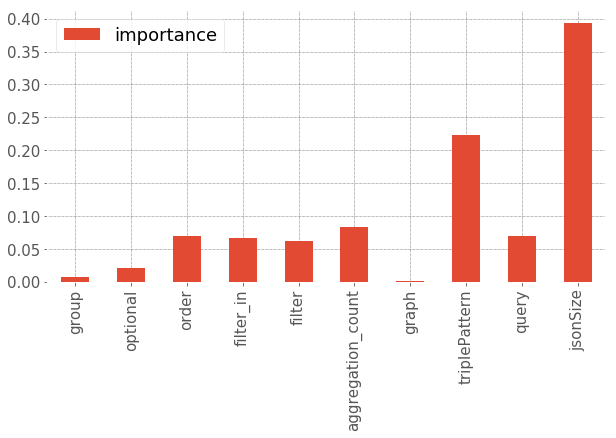

In [61]:
#feature importance
model = ensemble.RandomForestClassifier(n_estimators=1000)

X = df5[df5.columns[1:]].as_matrix()
y = df5['class'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df5.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})
df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query failures

* Results are influenced by the fact that Virtuoso seems to crash especially on low complexity queries with TP < 2
* Let's have a look at the features of these incorrect queries: everything seems less challenging than the average query!?

In [62]:
df4[df4['class'] == 0].describe().loc['mean'] - df4.describe().loc['mean']

class                   -1.715454
order                    0.047166
filter_in               -1.113505
limit                    0.078315
distinct                -0.406547
triplePattern           -4.516831
tp_?po                  -0.010386
union                   -0.678991
tp_?p?                  -3.024665
aggregation_count       -0.406547
tp_sp?                   0.382023
bgp                     -2.242306
graph                    0.004496
optional                -0.781295
keys                   -19.757826
filter                  -4.466944
tp_???                  -1.863803
group                   -0.193136
query                   -0.786518
jsonLines             -276.827910
jsonSize            -15091.929203
depth                   -1.084075
Name: mean, dtype: float64

In [63]:
df4[df4['class'] == 0]

,class,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xab,0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xac,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0
xac,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0
xac,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0
xac,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0


1. xac
    ```
    PREFIX owl: <http://www.w3.org/2002/07/owl#> PREFIX  dc: <http://purl.org/dc/elements/1.1/> 
    PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX  dcterms: <http://purl.org/dc/terms/> 

    SELECT ?type { <http://www.ncbi.nlm.nih.gov/gene/20998> a ?type } 
    ```
    
     - Number of results: 1
     - Always 0

2. xai
    ```
    PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX  dc: <http://purl.org/dc/elements/1.1/> 
    PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX  dcterms: <http://purl.org/dc/terms/> 
    PREFIX disq: <http://ns.ontoforce.com/2013/disqover#> 

    SELECT DISTINCT ?id WHERE { 
        <http://rdf.ebi.ac.uk/resource/chembl/molecule/CHEMBL2271022> disq:preferredUri ?pref .
        ?id disq:preferredUri ?pref . 
        } 

    ```
    
    - Number of results consensus: 1
    - Always 0
    
    

3. xzavz

    ```
    PREFIX owl: <http://www.w3.org/2002/07/owl#> 
    PREFIX  dc: <http://purl.org/dc/elements/1.1/> 
    PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
    PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    PREFIX  dcterms: <http://purl.org/dc/terms/> 
    PREFIX disq: <http://ns.ontoforce.com/2013/disqover#> 

    SELECT DISTINCT ?id WHERE { 
        <http://identifiers.org/pubmed/5568460> disq:preferredUri ?pref .
        ?id disq:preferredUri ?pref . 
    } 
    
    ```

    - Number of results consensus: 2
    - Always 0
       


### Conclusion: 

- something went wrong, certain queries where seemingly rejected by the Cluster, simple queries are overrepresented in the error, but the store didn't crash and in fact kept answering queries until the end!

* Possible hypothesis: these queries are all very simple and have only few answers. It seems reasonable that the answers to these queries could be in cache. There might have gone something wrong in this process. For example the server might have thought the query result was cached when in fact it was not, this would explain 1) the very low query runtimes and 2) the amount of results = 0
o

In [64]:
wrong_queries = list(set(list(df4[df4['class'] == 0].index)))

In [65]:
df[df.index.isin(wrong_queries)]['number_of_results'].value_counts()

0    2718
Name: number_of_results, dtype: int64

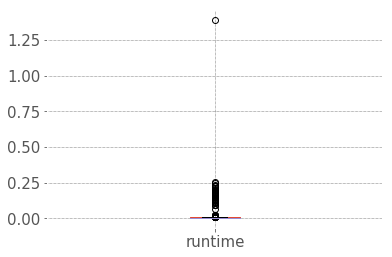

In [66]:
df[df.index.isin(wrong_queries)].plot(kind='box', y='runtime')

In [67]:
df[df.index.isin(wrong_queries)].describe()


,thread_id,order_id,number_of_results,runtime
count,2718.000000,2718.000000,2718.0,2718.000000
mean,16.000000,606.648271,0.0,0.008225
std,6.832558,350.775964,0.0,0.032027
min,1.000000,1.000000,0.0,0.003185
25%,17.000000,299.250000,0.0,0.004524
50%,18.500000,606.000000,0.0,0.005153
75%,20.000000,908.000000,0.0,0.006254
max,21.000000,1223.000000,0.0,1.387503


In [68]:
print('mean runtime of 8 ms, most 50% of queries between 4-6 ms')

mean runtime of 8 ms, most 50% of queries between 4-6 ms


# 3. Can we use Decision Trees to explain query runtimes (regression)


In [69]:
interesting_cols[0] = 'runtime'

## A Blazegraph Ontoforce

In [70]:
tup = tuple_list[0]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]



(468, 9)
(36, 9)


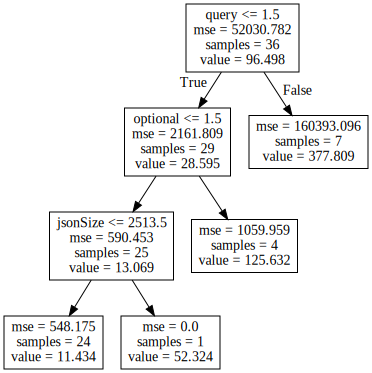

In [71]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations Blazegraph 

* Not enough successful queries, having multiple subqueries pushes the results towards timeout



group                0.001554
optional             0.214738
order                0.058405
filter_in            0.044715
filter               0.112926
aggregation_count    0.007947
graph                0.000000
triplePattern        0.149072
query                0.198206
jsonSize             0.212438
Name: importance, dtype: float64


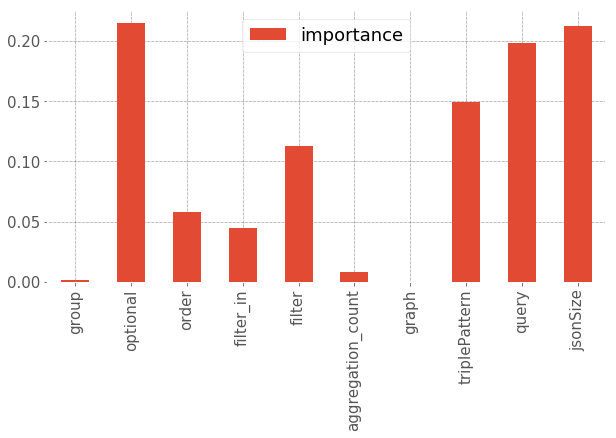

In [72]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query runtimes

* Too little queries to make big conclusions, feature importances are rather low

## B. ES N1 64 Ontoforce 

In [73]:
tup = tuple_list[1]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(7338, 9)
(4246, 9)


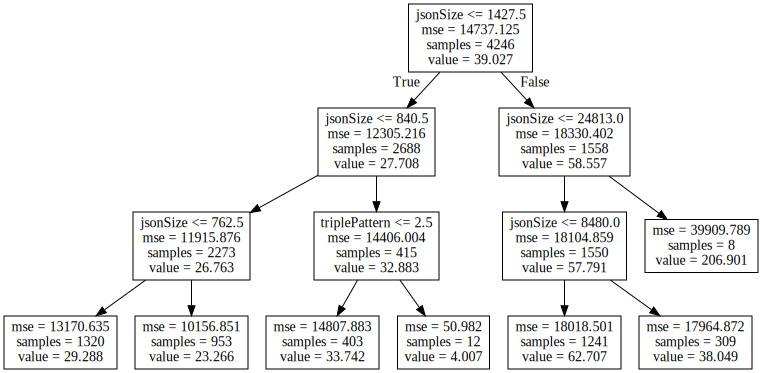

In [74]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations ES 

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All         | 4246 | 39.027      |  
| FIL $< 2$, UNION $\geq 1$ | 0.1%   | 310.93   |    
| FIL $\geq 2$, FIL IN $\geq 4$     | 0.1%  | 231.94  |
| FIL $\geq 2$, FILL IN $< 4$| 35%   | 58.00  |    
| FIL $< 2$, UNION=0| 65%   | 27.79  |    


* UNION operators and/or many FILTERS operators push the runtimes towards 5 minutes

In [75]:
print(2740/4246*100)
print(6/4246*100)
print(1496/4246*100)
print(4/4246*100)

64.53132359868111
0.1413094677343382
35.233160621761655
0.09420631182289213


group                0.003035
optional             0.055580
order                0.001571
filter_in            0.014526
filter               0.073933
aggregation_count    0.022891
graph                0.001499
triplePattern        0.037591
query                0.002426
jsonSize             0.786947
Name: importance, dtype: float64


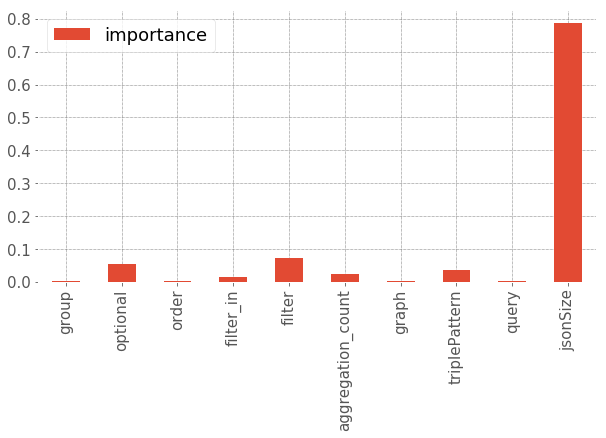

In [76]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query runtimes

* Main features:
    1. the amount of FILTERS has a huge impact
    2. the OPTIONAL keyword
    3. the amount of triple patterns

* 

## C. GraphDB_N1_64 Ontoforce 

In [77]:
tup = tuple_list[2]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(3955, 9)
(1583, 9)


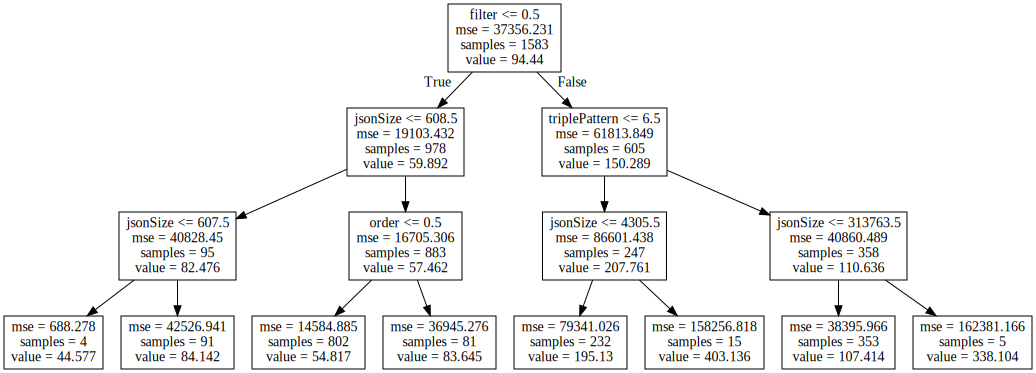

In [78]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations GraphDB 

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All         | 1583 |  94.44  |  
| FIL$=0$, ORD$=0$    | 57% | 57.75  |
| FIL$=0$, ORD$>0$    | 5%  | 83.64  |
| FIL$>0$, TP $\geq 7$| 23% | 110.64  |
| FIL$>0$, TP $<7$    | 16% | 207.76  |

* When the queries contain FILTERS or ORDER operators the query runtime goes up by a factor 2-4


In [79]:
#calculations
print(897/1583*100)
print(81/1583*100)
print(247/1583*100)
print(358/1583*100)

56.664560960202145
5.116866708780796
15.60328490208465
22.615287428932408


group                0.008962
optional             0.043689
order                0.008923
filter_in            0.022746
filter               0.154706
aggregation_count    0.020029
graph                0.001242
triplePattern        0.059889
query                0.012764
jsonSize             0.667050
Name: importance, dtype: float64


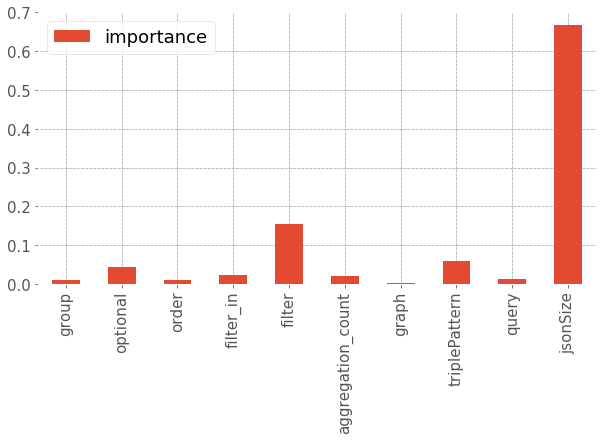

In [80]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query runtimes

* Main features:
    1. the amount of FILTERS has a huge impact
    2. the amount of triple patterns
    3. tp_???

## D. Virtuoso_N1_64 Ontoforce 

In [81]:
tup = tuple_list[3]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(7338, 9)
(7069, 9)


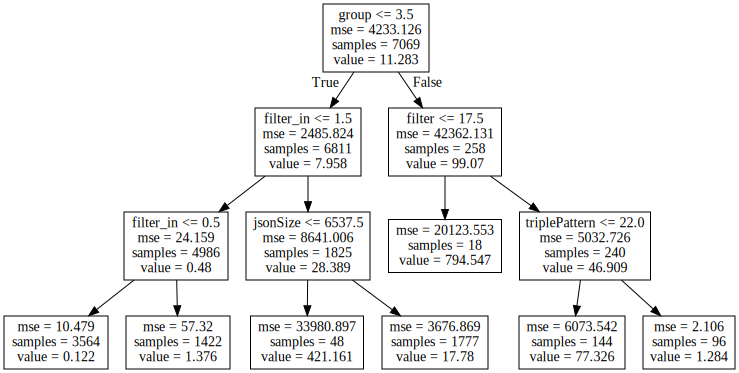

In [82]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations Virtuoso 64 

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All            | 7069 | 11.283s      |  
| GRP $ <    4$, FIL IN $< 2$| 71%  | 0.48s   |
| GRP $ <    4$, FIL IN $\geq 2$| 26%  | 28.39s  |    
| GRP $ \geq 4$, FIL $\geq 18$ | 3%   | 46.91s  |    
| GRP $ \geq 4$, FIL $< 18$| 0.3% | 794.55s |    

* The GROUP operator plays a major role for Virtuoso runtimes
* The presence of FILTER IN takes the queries from subsecond to the order of minutes (0.5min)

In [83]:
#calculations
print(4986/7069*100)
print(1825/7069*100)
print(18/7069*100)
print(240/7069*100)


70.53331447163671
25.816947234403738
0.2546329042297355
3.3951053897298062


group                6.717009e-02
optional             4.751256e-03
order                3.987562e-03
filter_in            4.878098e-02
filter               4.837232e-01
aggregation_count    3.022052e-05
graph                5.875337e-10
triplePattern        1.638954e-02
query                1.123295e-02
jsonSize             3.639342e-01
Name: importance, dtype: float64


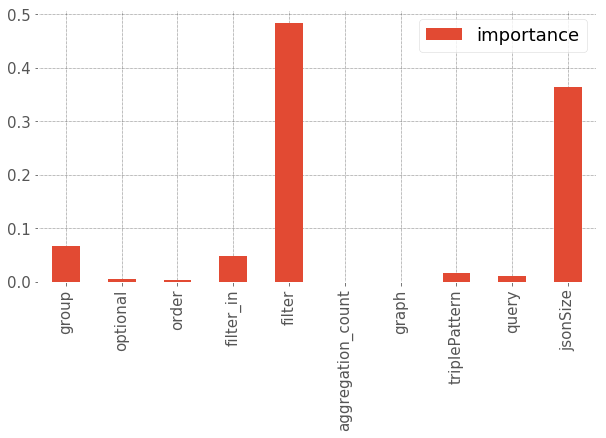

In [84]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])


### Feature Importance w.r.t. query runtimes

* Main features:
    1. the amount of FILTERS has a huge impact
    2. complete unbound triples tp_??? also have a determining impact
    3. the GROUP operator is also an important predictor

## E. Virtuoso_N1_32 Ontoforce 

In [85]:
tup = tuple_list[4]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(7338, 9)
(7072, 9)


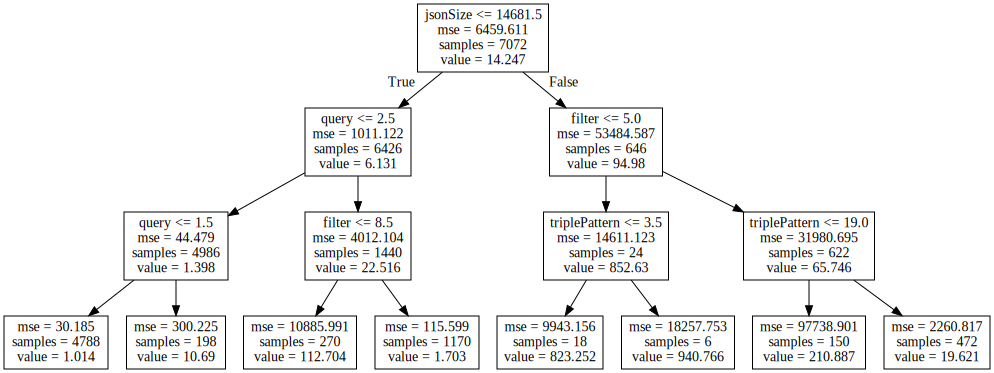

In [86]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph


### Does reducing Virtuosos memory have an impact on its abilities?

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All         | 7072           | 14.25s  |  
| FIL IN $<2$, $Q=1$           | 68%  | 1.01s   |
| FIL IN $<2$,$Q>1$            | 3%   | 10.69s  |    
| FIL IN $\geq 2$, FIL $\geq 5$| 29%  | 35.56s  |    
| FIL IN $\geq 2$, FIL $< 5$   | 0.3% | 852.63s  |    



* The FILTER IN has a major impact on the query runtimes
* The presence of additional subqueries pushes the runtime with a factor 10 from 1 -> 10s

* GROUP opeators seem to be playing less of a role??

In [87]:
print(4788/7072*100)
print(198/7072*100)
print(24/7072*100)
print(2062/7072*100)

67.70361990950227
2.799773755656109
0.3393665158371041
29.157239819004527


group                6.082233e-02
optional             1.949888e-02
order                5.427851e-03
filter_in            1.956567e-02
filter               4.137762e-01
aggregation_count    1.269091e-02
graph                8.021673e-10
triplePattern        1.513180e-01
query                2.204724e-02
jsonSize             2.948529e-01
Name: importance, dtype: float64


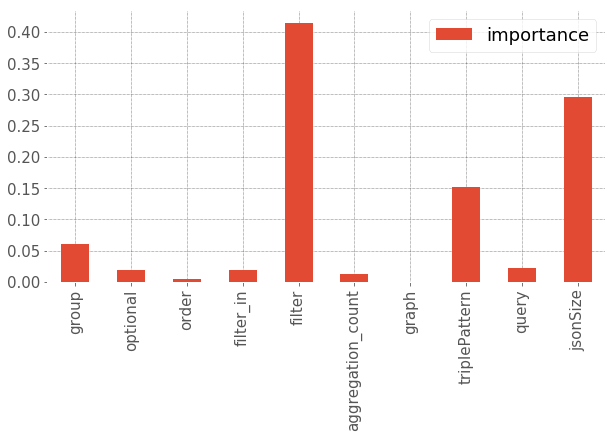

In [88]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])


### Feature Importance w.r.t. query runtimes

* Main features:
    1. the amount of FILTERS has a huge impact
    2. the unbound triple pattern tp_???
    3. the amount of triple patterns
    4. FILTER IN 

## F. Virtuoso_N3_64 _ 0 Ontoforce 

In [89]:
tup = tuple_list[5]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(7338, 9)
(4072, 9)


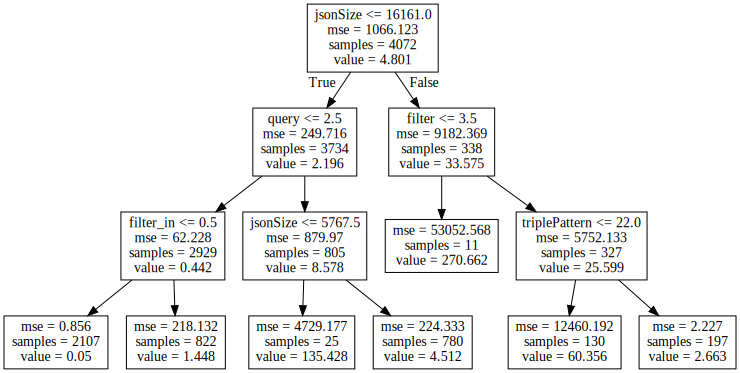

In [90]:

model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations VN3 0

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All         | 7338 |  4.801s  |  
| FIL IN $=0 $                  | 52%  | 0.05s   |
| FIL IN $=1$                   | 20%  | 1.448s  |    
| FIL IN $\geq 2$, ??? $\geq 1$ | 28%  | 14.016s  |    
| FIL IN $\geq 2$, ???=0        | 0.1% | 572.308s  |    


* In the cluster simulations the FILTER IN operator has a big impact on the runtimes

In [91]:
#calculations
print(2107/4072*100)
print(822/4072*100)
print(4/4072*100)
print(1139/4072*100)

51.74361493123772
20.18664047151277
0.09823182711198428
27.971512770137526


group                4.926699e-03
optional             1.784512e-02
order                2.223891e-03
filter_in            3.730885e-02
filter               2.347134e-01
aggregation_count    8.915759e-04
graph                8.907190e-08
triplePattern        1.751835e-01
query                6.058747e-02
jsonSize             4.663194e-01
Name: importance, dtype: float64


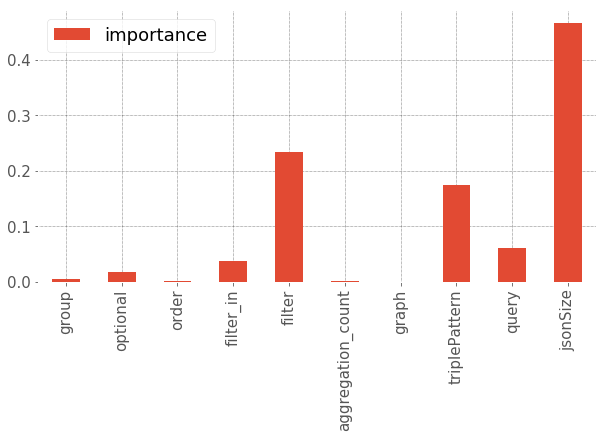

In [92]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query runtimes

* Main features:
    1. unbound triples are a real troublemaker
    2. the filter in operator as well
    3. the GROUP operator has a much smaller impact


## G. Virtuoso_N3_64 _ 2 Ontoforce 

In [93]:
tup = tuple_list[6]

filename = generateFilenameQueryEventsCorrect(tup)
df = pd.read_csv(filename, sep='\t')
df.index = df['query_name'].apply(lambda q: q[8:]).values
df = df.dropna()
print(df.shape)
df_filtered = df[(df['flag'] == 'SUCCESS') & (df['correct'] == 'CORRECT')]
print(df_filtered.shape)
df_filtered2 = df_filtered[['runtime']]
df_joined = df_filtered2.join(df_queryfeatures)
df_joined2 = df_joined[interesting_cols]

(7338, 9)
(3918, 9)


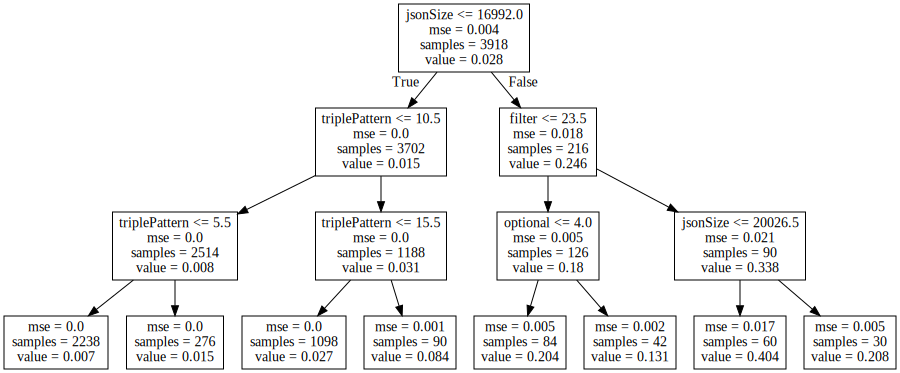

In [94]:
model = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=20)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()

model.fit(X,y)

treedata = tree.export_graphviz(model, out_file=None, feature_names=df_joined2.columns[1:]) 
graph = graphviz.Source(treedata) 
graph.render(output_dir + "Runtimes_" + generateSimulationIDCompact(tup), view=False)

graph

### Observations VN3_2

| Rule   | #Queries  | avg_runtime | 
|--------|-----------|-------------|
| All         | 3324 | 0.028s  |  
| FIL $< 20$, ??? $< 6$  | 85%  | 0.012s  |
| FIL $< 20$, ??? $\geq 6$  | 10%   | 0.048s  |    
| FIL $\geq 20$, TP $< 22$ | 3%   | 0.18s  |    
| FIL $\geq 20$, TP $\geq 22$| 2%   | 0.338  |    

* Curious

In [95]:
#calculations
print(3324/3918*100)
print(378/3918*100)
print(126/3918*100)
print(90/3918*100)


84.83920367534456
9.647779479326186
3.215926493108729
2.2970903522205206


group                0.002302
optional             0.016047
order                0.000018
filter_in            0.000009
filter               0.253015
aggregation_count    0.000012
graph                0.000006
triplePattern        0.267451
query                0.000005
jsonSize             0.461134
Name: importance, dtype: float64


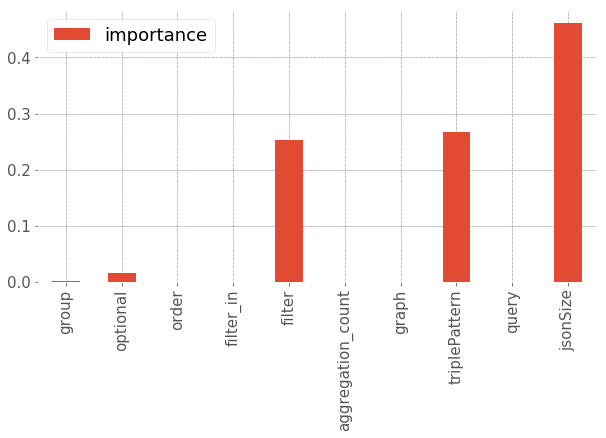

In [96]:
#feature importance
model = ensemble.RandomForestRegressor(n_estimators=1000)

X = df_joined2[df_joined2.columns[1:]].as_matrix()
y = df_joined2['runtime'].as_matrix()
model.fit(X,y)

rows  = []
for imp, f in zip(list(model.feature_importances_), list(df_joined2.columns[1:])):
    #print(str(imp) + "\t\t <= \t" + str(f))
    rows.append({'importance': imp, "feature":f})

df_fi = pd.DataFrame(rows)    
df_fi.index = df_fi.feature.values
df_fi.plot(kind='bar', y='importance', figsize=(10,5))
print(df_fi['importance'])

### Feature Importance w.r.t. query runtimes

* Main features:
    1. the amount of FILTERS has a huge impact
    2. the amount of triple patterns
    3. the tp???
    
Runtimes are really small here, so results seem hard to interprete?    
